<a href="https://colab.research.google.com/github/vibhuvanjari-Kellogg/regression-modeling-HousePrices/blob/main/Mod_2_House_Prices_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Link to access this code - https://colab.research.google.com/drive/1mryWq2_iZNdTU_TyRtH-5n162GsY_jpn#scrollTo=7y4rMean3dea

Part 1 of this code - https://colab.research.google.com/drive/1Cg5IznYQKiKiPJjcd3S_TltXvsYuW5Cw

Data taken from - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/

### Import modules and data files

In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# To ensure all columns are displayed when calling data
pd.set_option('display.max_columns', None)

In [ ]:
df_train_original = pd.read_csv('train.csv')
df_test_original = pd.read_csv('test.csv')

In [ ]:
df_train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#df_train_original.describe()
df_test_original.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
df_test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Merge and clean data

#### Merge data

In [ ]:
# Create working datasets
df_train = df_train_original
df_test =  df_test_original

# Add a variable to both df_train and df_test indicating whether train or test dataset
df_train['TestYes'] = 0
df_test['TestYes'] = 1

# Create merged dataset used to cleanup data
df_merged = pd.concat([df_train, df_test])

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

#### Checking missing data

##### Missing Exterior1st and Exterior2nd data

One observation ID 2152, has missing Exterior1st and Exterior2nd data.
Hypothesis: the exterior covering can be determined by similar houses in the neighborhood.

In [ ]:
# Filter to "Edwards" Neighborhood, "1Fam" BldgType houses, built in similar years
filtered_df = df_merged[(df_merged['Neighborhood'] == 'Edwards') & (df_merged['BldgType'] == '1Fam') & (df_merged['YearBuilt'] >= 1930) & (df_merged['YearBuilt'] <= 1945)]

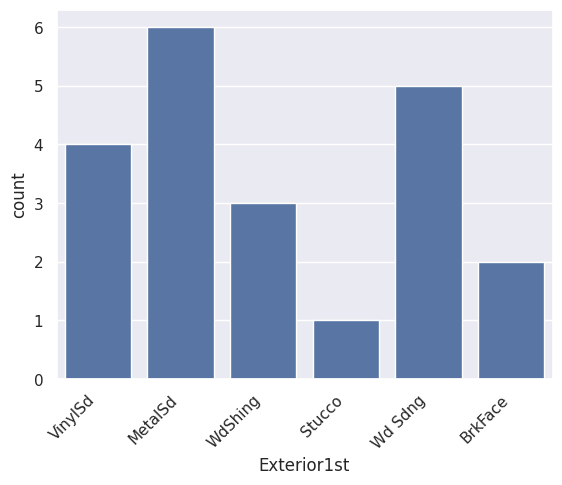

In [ ]:
# Plot distribution of Exterior1st and Exterior2nd for these
sns.countplot(x='Exterior1st', data=filtered_df.reset_index())
plt.xticks(rotation=45, ha='right')
plt.show()

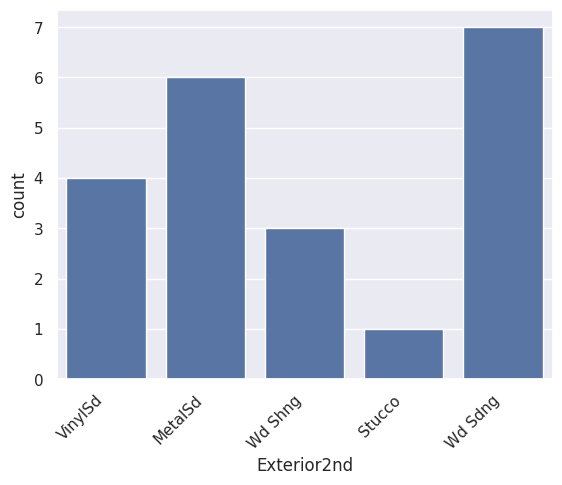

In [ ]:
# Plot distribution of Exterior1st and Exterior2nd for these
sns.countplot(x='Exterior2nd', data=filtered_df.reset_index())
plt.xticks(rotation=45, ha='right')
plt.show()

Assume that the Exterior1st is MetalSd and Exterior2nd is Wd Sdng

##### Missing BsmtQual data

Observation ID 2218 and 2219 have missing BsmtQual data. Hypothesis: the BsmtQual can be determined by houses built/remodeled in a similar time frame.

<Axes: xlabel='BsmtQual', ylabel='count'>

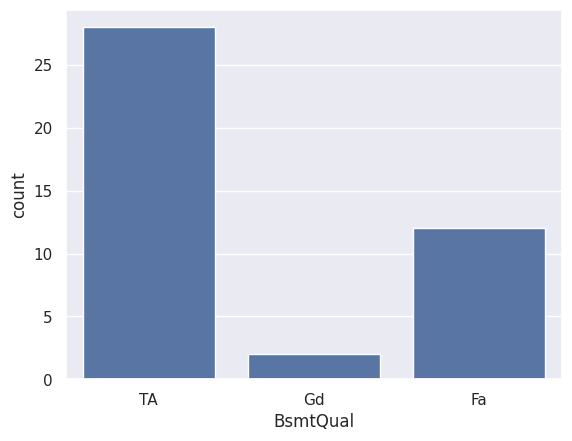

In [ ]:
# checking 2218 based on YearBuilt
filtered_df = df_merged[(df_merged['YearBuilt'] >= 1890) & (df_merged['YearBuilt'] <= 1900)]
sns.countplot(x='BsmtQual', data=filtered_df.reset_index())


<Axes: xlabel='BsmtQual', ylabel='count'>

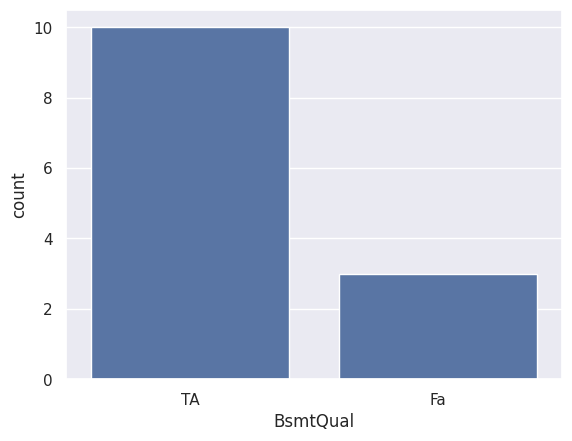

In [ ]:
# checking 2218 based on YearBuilt and YearRemodAdd
filtered_df = df_merged[(df_merged['YearBuilt'] >= 1890) & (df_merged['YearBuilt'] <= 1900) & (df_merged['YearRemodAdd'] >= 1945) & (df_merged['YearRemodAdd'] <= 1955)]
sns.countplot(x='BsmtQual', data=filtered_df.reset_index())

<Axes: xlabel='BsmtQual', ylabel='count'>

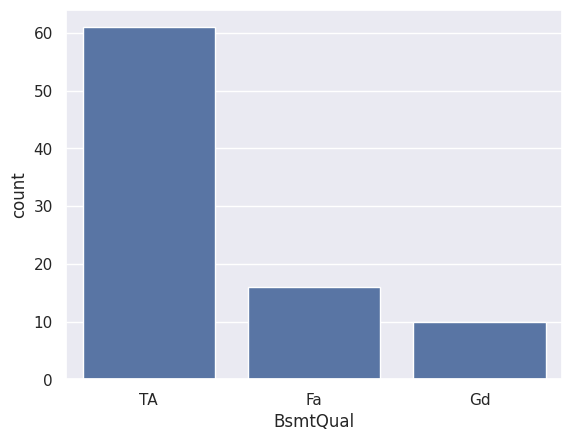

In [ ]:
# checking 2219 based on YearBuilt
filtered_df = df_merged[(df_merged['YearBuilt'] >= 1905) & (df_merged['YearBuilt'] <= 1915)]
sns.countplot(x='BsmtQual', data=filtered_df.reset_index())

<Axes: xlabel='BsmtQual', ylabel='count'>

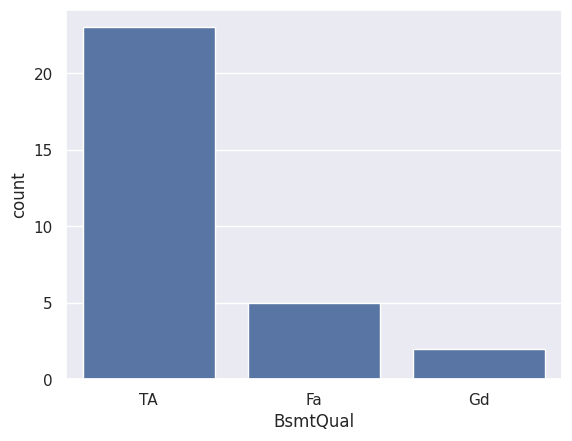

In [ ]:
# checking 2219 based on YearBuilt and YearRemodAdd
filtered_df = df_merged[(df_merged['YearBuilt'] >= 1905) & (df_merged['YearBuilt'] <= 1915) & (df_merged['YearRemodAdd'] >= 1995) & (df_merged['YearRemodAdd'] <= 2005)]
sns.countplot(x='BsmtQual', data=filtered_df.reset_index())

For ID 2218 and 2219, assume that the BsmtQual is TA.

---



##### Missing BsmtCond data

Observation ID 2041, 2186 and 2525 have missing BsmtCond data. Hypothesis: the BsmtQual can be determined by houses built/remodeled in a similar time frame.

<Axes: xlabel='BsmtCond', ylabel='count'>

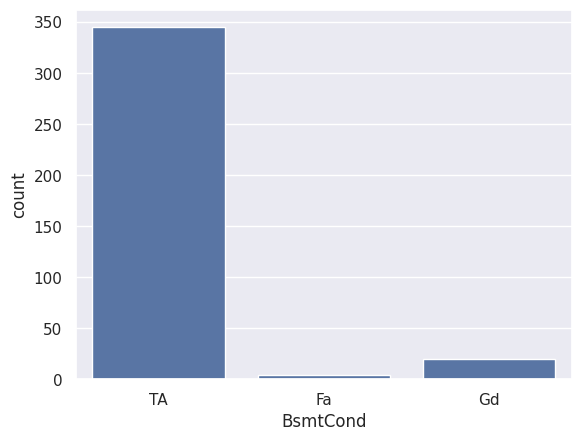

In [ ]:
# checking 2041, 2186 and 2525 based on YearBuilt
filtered_df = df_merged[(df_merged['YearBuilt'] >= 1970) & (df_merged['YearBuilt'] <= 1980)]
sns.countplot(x='BsmtCond', data=filtered_df.reset_index())

<Axes: xlabel='BsmtCond', ylabel='count'>

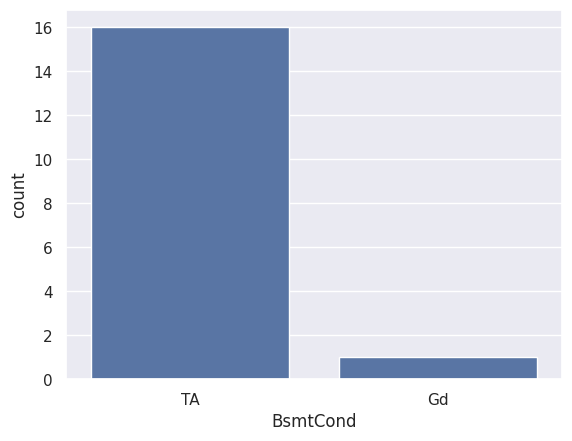

In [ ]:
# checking 2041 based on YearBuilt and YearRemodAdd
filtered_df = df_merged[(df_merged['YearBuilt'] >= 1970) & (df_merged['YearBuilt'] <= 1980) & (df_merged['YearRemodAdd'] >= 2005) & (df_merged['YearRemodAdd'] <= 2010)]
sns.countplot(x='BsmtCond', data=filtered_df.reset_index())

<Axes: xlabel='BsmtCond', ylabel='count'>

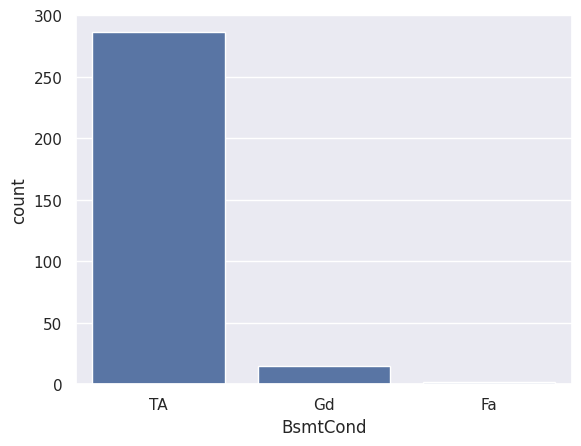

In [ ]:
# checking 2186 and 2525 based on YearBuilt and YearRemodAdd
filtered_df = df_merged[(df_merged['YearBuilt'] >= 1970) & (df_merged['YearBuilt'] <= 1980) & (df_merged['YearRemodAdd'] >= 1970) & (df_merged['YearRemodAdd'] <= 1980)]
sns.countplot(x='BsmtCond', data=filtered_df.reset_index())

For ID 2041, 2186 and 2525 assume that the BsmtCond is TA.

##### Missing Electrical data

<Axes: xlabel='Electrical', ylabel='count'>

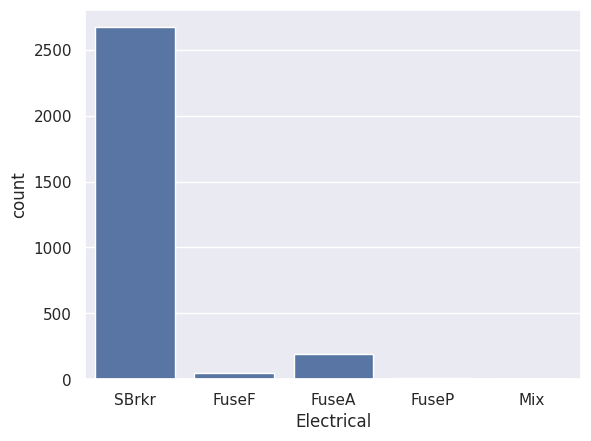

In [ ]:
#Plot Electrical data
sns.countplot(x='Electrical', data=df_merged.reset_index())

<Axes: xlabel='Electrical', ylabel='count'>

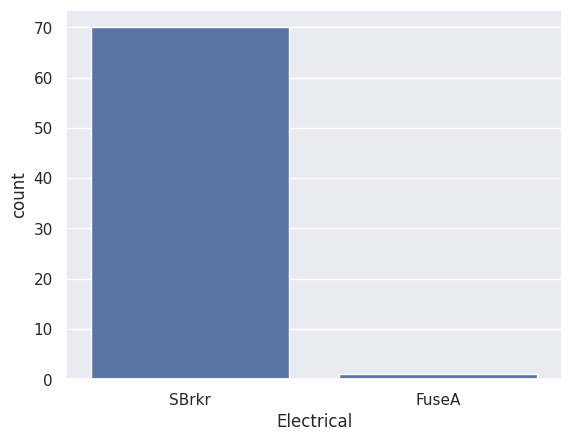

In [ ]:
#Plot Electrical data filter to neighborhood "Timber"
filtered_df = df_merged[df_merged['Neighborhood'] == 'Timber']
sns.countplot(x='Electrical', data=filtered_df.reset_index())

<Axes: xlabel='Electrical', ylabel='count'>

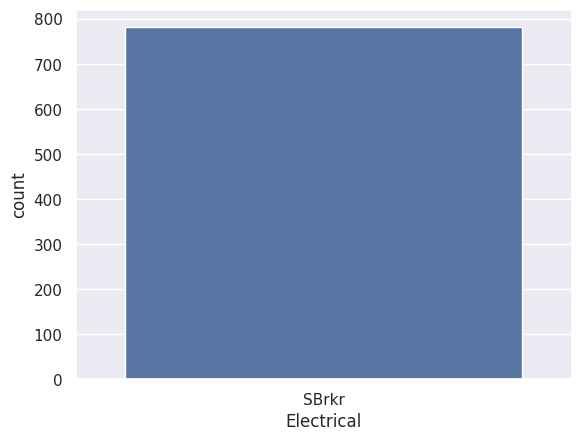

In [ ]:
#Plot Electrical data filter to YearBuilt 2000-2010
filtered_df = df_merged[(df_merged['YearBuilt'] >= 2000) & (df_merged['YearBuilt'] <= 2010)]
sns.countplot(x='Electrical', data=filtered_df.reset_index())

For ID 1380 assume that the Electrical is SBrkr.

##### Missing KitchenQual data

<Axes: xlabel='KitchenQual', ylabel='count'>

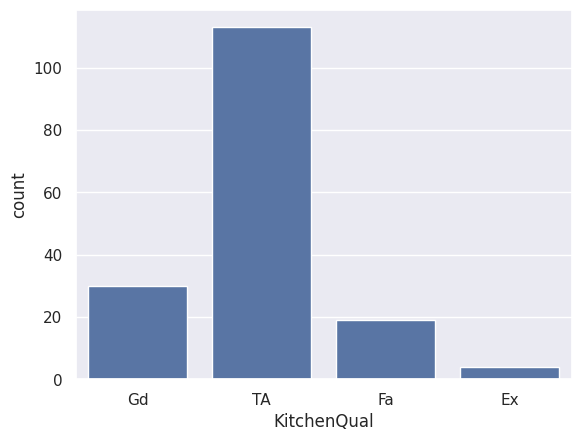

In [ ]:
# checking 1556 based on YearBuilt
filtered_df = df_merged[(df_merged['YearBuilt'] >= 1910) & (df_merged['YearBuilt'] <= 1920)]
sns.countplot(x='KitchenQual', data=filtered_df.reset_index())


<Axes: xlabel='KitchenQual', ylabel='count'>

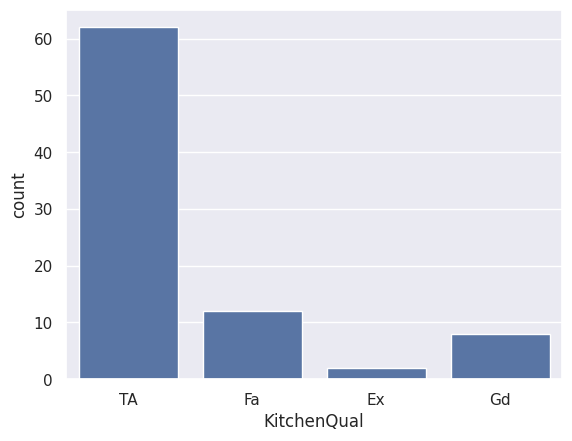

In [ ]:
# checking 1556 based on YearBuilt and YearRemodAdd
filtered_df = df_merged[(df_merged['YearBuilt'] >= 1910) & (df_merged['YearBuilt'] <= 1920) & (df_merged['YearRemodAdd'] >= 1945) & (df_merged['YearRemodAdd'] <= 1955)]
sns.countplot(x='KitchenQual', data=filtered_df.reset_index())


<Axes: xlabel='KitchenQual', ylabel='count'>

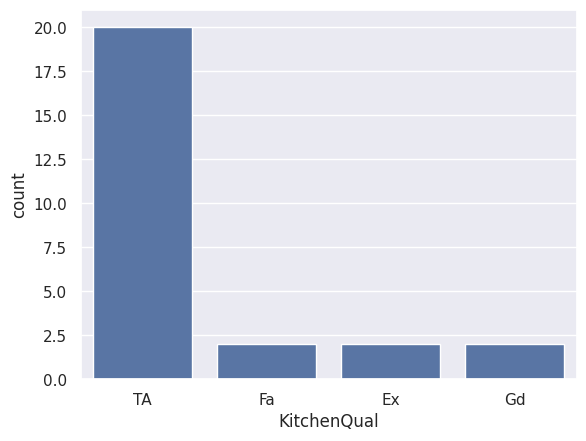

In [ ]:
# checking 1556 based on YearBuilt, YearRemodAdd and OverallQual
filtered_df = df_merged[(df_merged['YearBuilt'] >= 1910) & (df_merged['YearBuilt'] <= 1920) & (df_merged['YearRemodAdd'] >= 1945) & (df_merged['YearRemodAdd'] <= 1955) & (df_merged['OverallQual'] == 5)]
sns.countplot(x='KitchenQual', data=filtered_df.reset_index())

For ID 1556 assume that the KitchenQual is TA.

##### Missing Functional data

<Axes: xlabel='Functional', ylabel='count'>

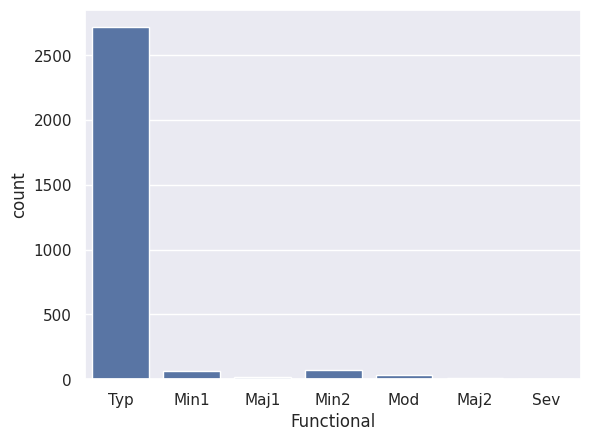

In [ ]:
# check distribution of Functional data
sns.countplot(x='Functional', data=df_merged.reset_index())

<Axes: xlabel='OverallQual', ylabel='Functional'>

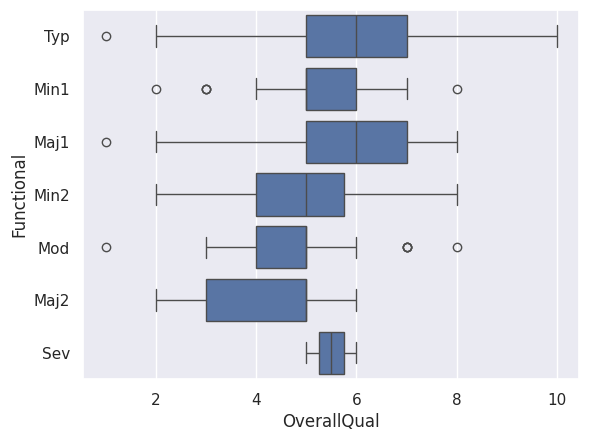

In [ ]:
# plot Functional vs OverallQual
sns.boxplot(x='OverallQual', y='Functional', data=df_merged.reset_index())

Doesn't seem like a strong correlation between Functional and OverallQual.

<Axes: xlabel='OverallCond', ylabel='Functional'>

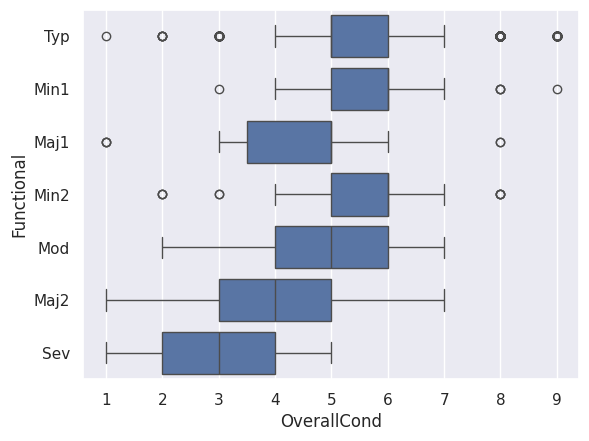

In [ ]:
# plot Functional vs OverallCond
sns.boxplot(x='OverallCond', y='Functional', data=df_merged.reset_index())

Seems like a stronger correlation between Functional and OverallCond.

<Axes: xlabel='Functional', ylabel='count'>

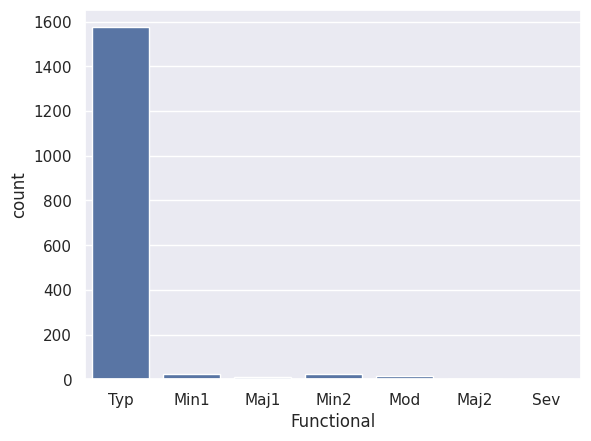

In [ ]:
# check distribution of Functional data when OverallCond == 5
filtered_df = df_merged[df_merged['OverallCond'] == 5]
sns.countplot(x='Functional', data=filtered_df.reset_index())

<Axes: xlabel='Functional', ylabel='count'>

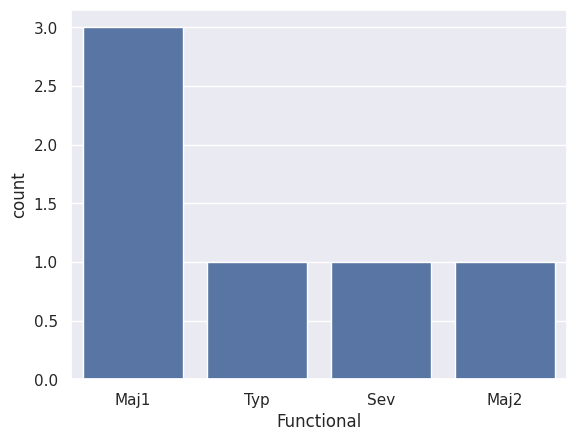

In [ ]:
# check distribution of Functional data when OverallCond == 1
filtered_df = df_merged[df_merged['OverallCond'] == 1]
sns.countplot(x='Functional', data=filtered_df.reset_index())

For ID 2217 assume that the Functional is "Typ" for ID 2474 assume that Functional is "Maj1".

##### Missing garage data

ID 2127 and 2577 have multiple missing garage data elements

<Axes: xlabel='GarageFinish', ylabel='count'>

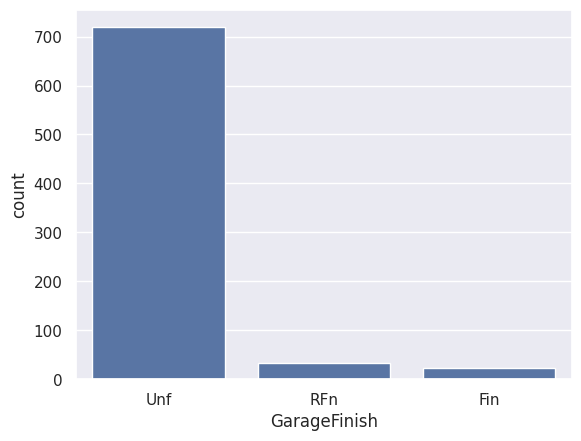

In [ ]:
# Check distribution of GarageFinish for "Detchd" GarageType
filtered_df = df_merged[df_merged['GarageType'] == 'Detchd']
sns.countplot(x='GarageFinish', data=filtered_df.reset_index())

<Axes: xlabel='GarageYrBlt', ylabel='YearBuilt'>

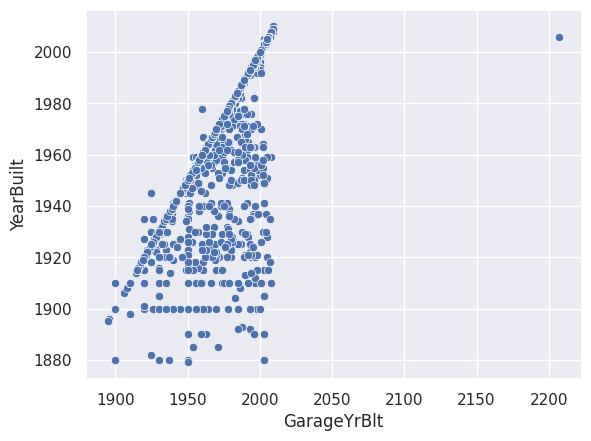

In [ ]:
# Check relationship between GarageYrBlt and YearBuilt, exclude observations with no garage
filtered_df = df_merged[df_merged['GarageType'] != 'NG']
sns.scatterplot(x='GarageYrBlt', y='YearBuilt', data=filtered_df.reset_index())

In [ ]:
# Filtering down to houses that were remodeled and have a detached garage
filtered_df = df_merged[df_merged['GarageType'] != 'NG']
filtered_df = filtered_df[filtered_df['YearBuilt'] != filtered_df['YearRemodAdd']]
filtered_df = filtered_df[filtered_df['GarageType'] == 'Detchd']

# check what percentage of filtered_df have GarageYrBlt == YearBuilt vs whath percentage have GarageYrBlt == YearRemodAdd
total = len(filtered_df)

same_as_yearbuilt = (filtered_df['GarageYrBlt'] == filtered_df['YearBuilt']).sum()
same_as_remod = (filtered_df['GarageYrBlt'] == filtered_df['YearRemodAdd']).sum()
different_from_both = ((filtered_df['GarageYrBlt'] != filtered_df['YearBuilt']) & (filtered_df['GarageYrBlt'] != filtered_df['YearRemodAdd'])).sum()

print(f"GarageYrBlt == YearBuilt: {same_as_yearbuilt / total:.2%}")
print(f"GarageYrBlt == YearRemodAdd: {same_as_remod / total:.2%}")
print(f"GarageYrBlt != YearBuilt and != YearRemodAdd: {different_from_both / total:.2%}")

GarageYrBlt == YearBuilt: 44.21%
GarageYrBlt == YearRemodAdd: 4.25%
GarageYrBlt != YearBuilt and != YearRemodAdd: 51.54%


In [ ]:
# Hard to accurately predict when the garages were built, to make further estimates assume the garage was built somewhere in between when the house was built and remodelled.

# Drop rows from filtered_df with missing GarageYrBlt
filtered_df = filtered_df.dropna(subset=['GarageYrBlt'])

# Calculate age of house at sale
filtered_df['AgeAtSale'] = filtered_df['YrSold'] - filtered_df['YearBuilt']

# Calculate age of house when garage was built
filtered_df['AgeAtGarBlt'] = filtered_df['GarageYrBlt'] - filtered_df['YearBuilt']

# Calcualte % of house age passed when garage was built
filtered_df['%AgeAtGarBlt'] = filtered_df['AgeAtGarBlt'] / filtered_df['AgeAtSale']

# Provide descriptive statistics for %AgeAtGarBlt include median
filtered_df['%AgeAtGarBlt'].describe()

,%AgeAtGarBlt
count,515.000000
mean,0.243797
std,0.310625
min,-0.202703
25%,0.000000
50%,0.056338
75%,0.482140
max,0.989899


In [ ]:
# Find median of %AgeAtGarBlt
med_GartoHouseBlt = filtered_df['%AgeAtGarBlt'].median()
med_GartoHouseBlt

0.056338028169014086

<Axes: xlabel='%AgeAtGarBlt', ylabel='Count'>

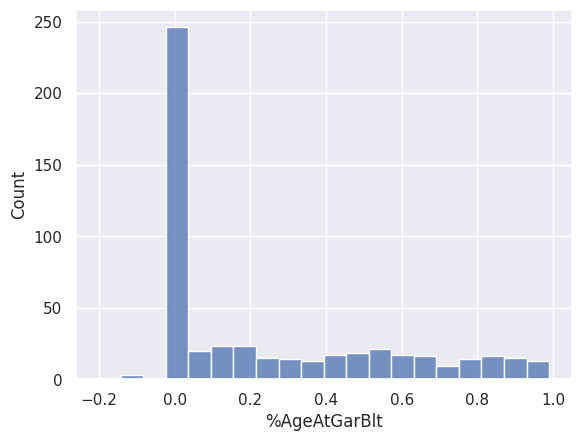

In [ ]:
# Plot %AgeAtGarBlt, divide into 20 bars
sns.histplot(filtered_df['%AgeAtGarBlt'], bins=20)

The median garage is built (5.6% of age of house at sale) years after the house is built.

<Axes: xlabel='GarageCars', ylabel='count'>

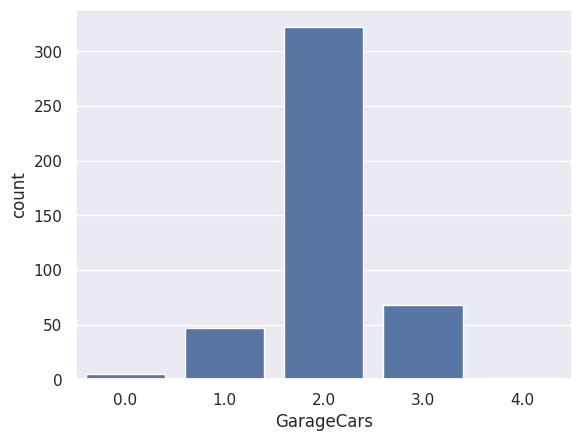

In [ ]:
# Estimating number of GarageCars for ID 2577

# Distribution of GarageCars for BldgType == "1Fam", HouseStyle == "2Story", BedroomAbvGr == 3
filtered_df = df_merged[(df_merged['BldgType'] == '1Fam') & (df_merged['HouseStyle'] == '2Story') & (df_merged['BedroomAbvGr'] == 3)]
sns.countplot(x='GarageCars', data=filtered_df.reset_index())

<Axes: xlabel='GarageCars', ylabel='count'>

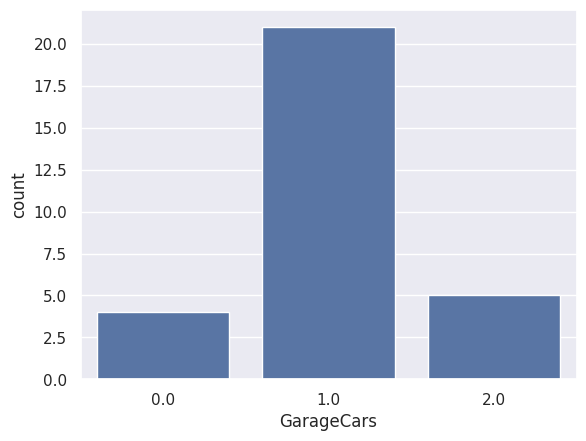

In [ ]:
# Distribution of GarageCars for BldgType == "1Fam", HouseStyle == "2Story", BedroomAbvGr == 3, Neighborhood == "IDOTRR"
filtered_df = df_merged[(df_merged['BldgType'] == '1Fam') & (df_merged['BedroomAbvGr'] == 3) & (df_merged['Neighborhood'] == 'IDOTRR')]
sns.countplot(x='GarageCars', data=filtered_df.reset_index())

In [ ]:
# Estimating area of a single car garage in IDOTRR
filtered_df = df_merged[(df_merged['BldgType'] == '1Fam') & (df_merged['BedroomAbvGr'] == 3) & (df_merged['Neighborhood'] == 'IDOTRR')]
filtered_df['GarageArea'].describe()

,GarageArea
count,30.000000
mean,318.566667
std,200.683948
min,0.000000
25%,216.000000
50%,284.000000
75%,388.500000
max,720.000000


In [ ]:
filtered_df['GarageArea'].median()

284.0

For ID 2127 and 2577:
*   Set GarageFinish to "Unf" since that is most popular for "Detchd" GarageType
*   Set GarageYrBlt to be YearBuilt + 5.6%*(YrSold - YearBuilt) - this is based on the median value med_GartoHouseBlt
*   Set GarageQual and GarageCond to "TA"

For ID 2577:
*   Set GarageCars to 1
*   Set GarageArea to 300 (between mean and median)

##### Missing MSZoning data

<Axes: xlabel='MSZoning', ylabel='count'>

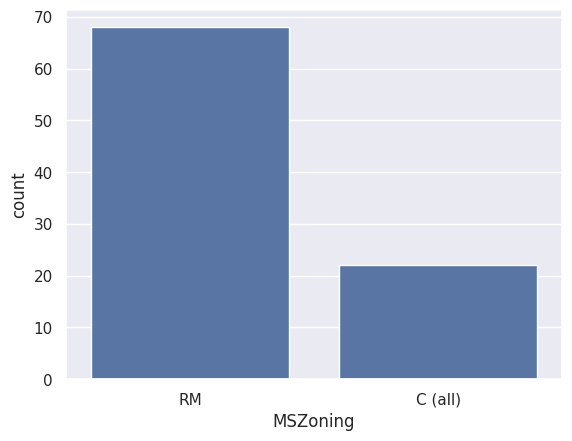

In [ ]:
# Check distribution of MSZoning data in IDOTRR neighborhood
filtered_df = df_merged[df_merged['Neighborhood'] == 'IDOTRR']
sns.countplot(x='MSZoning', data=filtered_df.reset_index())

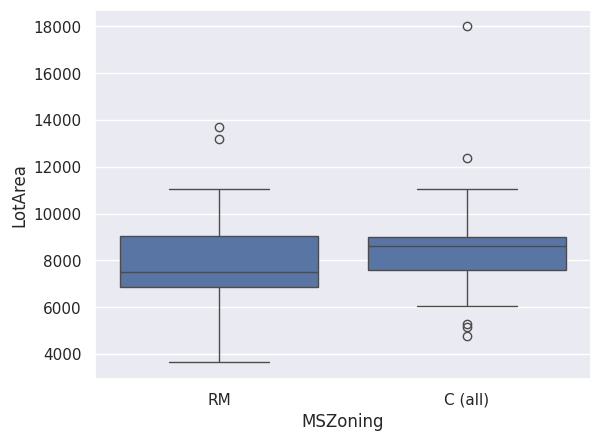

In [ ]:
# In IDOTRR neighborhood, find distribution of LotArea for MSZoning type "RM" and "C (all)"
filtered_df = df_merged[(df_merged['Neighborhood'] == 'IDOTRR')]
sns.boxplot(x='MSZoning', y='LotArea', data=filtered_df.reset_index())
plt.show()

Id 2251, 1916 and 2217 are some of the largest lots in the IDOTRR neighborhood. Looking at two metrics of population density 1) BedroomAbvGr/LotArea and 2) 1stFlrSF/LotArea, they should be classified as "C (all)".

<Axes: xlabel='MSZoning', ylabel='count'>

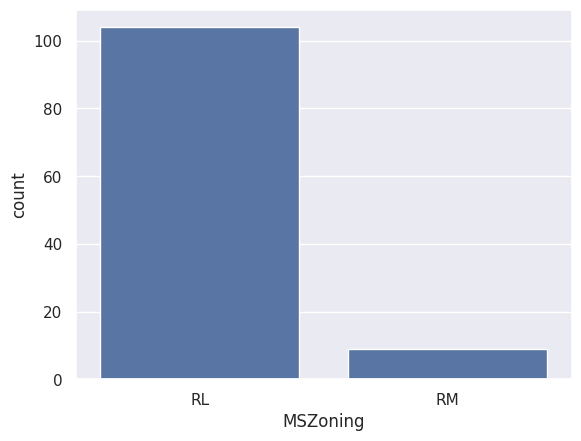

In [ ]:
# Check distribution of MSZoning data in Mitchel neighborhood
filtered_df = df_merged[df_merged['Neighborhood'] == 'Mitchel']
sns.countplot(x='MSZoning', data=filtered_df.reset_index())

Looking at two metrics of population density 1) BedroomAbvGr/LotArea and 2) 1stFlrSF/LotArea, Id 2905 should be classified "RL".

#### Clean data

In [ ]:
# Removing features where data is hard to predict
df_merged = df_merged.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Utilities', 'LotFrontage'], axis=1)
# Small number have observations for Alley, PoolQC, Fence and MiscFeatures, doesn't make sense to predict these for all the rest
# LotFrontage is a numeric variable that has lots of missing values
# Removed Utilities because all but one observation had Utilities = AllPub, wouldn't make a significant difference on prediciton

# Modifying FireplaceQu missing values to indicate "NF" to indicate "No Fireplace"
df_merged['FireplaceQu'] = df_merged['FireplaceQu'].fillna('NF')

# Modifying MasVnrArea and MasVnrType missing values to indicate "0" and "None" respectively.
# Assumption: if these values are missing there is no masonry veneer.
df_merged['MasVnrType'] = df_merged['MasVnrType'].fillna('None')
df_merged['MasVnrArea'] = df_merged['MasVnrArea'].fillna(0)

# When GarageArea is 0 categorical variables GarageType, GarageFinish, GarageQual and GarageCond should be set to "NG" to indicate "No Garage"
columns_to_update = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df_merged.loc[df_merged['GarageArea'] == 0, columns_to_update] = 'NG'

# When GarageArea is 0 set GarageYrBlt to 0
df_merged.loc[df_merged['GarageArea'] == 0, 'GarageYrBlt'] = 0

# Set BsmTExpsoure to "No" for missing values if all square footage in the basement is unfinished
df_merged.loc[(df_merged['BsmtFinSF1'] == 0) & (df_merged['BsmtFinSF2'] == 0) & (df_merged['BsmtUnfSF'] > 0) & (df_merged['BsmtExposure'].isna()), 'BsmtExposure'] = 'No'

# Assume if TotalBsmtSF is missing, there is no basement
df_merged['TotalBsmtSF'] = df_merged['TotalBsmtSF'].fillna(0)

# When TotalBsmtSF is 0 categorical variables BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 should be set to "NB" to indicate "No Basement"
columns_to_update = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df_merged.loc[df_merged['TotalBsmtSF'] == 0, columns_to_update] = 'NB'

# When TotalBsmtSF is 0 numerical variables BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, BsmtFullBath and BsmtHalfBath should be set to 0.
columns_to_update = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']
df_merged.loc[df_merged['TotalBsmtSF'] == 0, columns_to_update] = 0

# Set missing values of BsmtFinType2 to "Unf" if BsmtFinType1 isn't "NB"
df_merged.loc[(df_merged['BsmtFinType1'] != 'NB') & (df_merged['BsmtFinType2'].isna()), 'BsmtFinType2'] = 'Unf'



Specific fixes in test data based on "Checking missing data" section

In [ ]:
# For Id = 2152, set Exterior1st to "MetalSd" and Exterior2nd to "Wd Sdng"
df_merged.loc[df_merged['Id'] == 2152, 'Exterior1st'] = 'MetalSd'
df_merged.loc[df_merged['Id'] == 2152, 'Exterior2nd'] = 'Wd Sdng'

# For Id = 2218 and 2219, set BsmtQual to "TA"
df_merged.loc[df_merged['Id'] == 2218, 'BsmtQual'] = 'TA'
df_merged.loc[df_merged['Id'] == 2219, 'BsmtQual'] = 'TA'

# For Id = 2041, 2186 and 2525, set BsmtCond to "TA"
df_merged.loc[df_merged['Id'] == 2041, 'BsmtCond'] = 'TA'
df_merged.loc[df_merged['Id'] == 2186, 'BsmtCond'] = 'TA'
df_merged.loc[df_merged['Id'] == 2525, 'BsmtCond'] = 'TA'

# For Id = 1380, set Electrical to "SBrkr"
df_merged.loc[df_merged['Id'] == 1380, 'Electrical'] = 'SBrkr'

# For Id = 1556, set KitchenQual to "TA"
df_merged.loc[df_merged['Id'] == 1556, 'KitchenQual'] = 'TA'

# For Id 2217 set Functional to "Typ" for ID 2474 set Functional to "Maj1".
df_merged.loc[df_merged['Id'] == 2217, 'Functional'] = 'Typ'
df_merged.loc[df_merged['Id'] == 2474, 'Functional'] = 'Maj1'

# For Id 2593 set GarageYrBlt to 2007 same as YearRemodAdd, data initially has this as 2207.
df_merged.loc[df_merged['Id'] == 2593, 'GarageYrBlt'] = 2007

# For Id 2127 and 2577 set GarageFinish to "Unf"
df_merged.loc[df_merged['Id'] == 2127, 'GarageFinish'] = 'Unf'
df_merged.loc[df_merged['Id'] == 2577, 'GarageFinish'] = 'Unf'

# For Id 2127 and 2577 set GarageQual to "TA" and set GarageCond to "TA"
df_merged.loc[df_merged['Id'] == 2127, 'GarageQual'] = 'TA'
df_merged.loc[df_merged['Id'] == 2127, 'GarageCond'] = 'TA'
df_merged.loc[df_merged['Id'] == 2577, 'GarageQual'] = 'TA'
df_merged.loc[df_merged['Id'] == 2577, 'GarageCond'] = 'TA'

# For Id 2577 set GarageCars to 1 and GarageArea to 300
df_merged.loc[df_merged['Id'] == 2577, 'GarageCars'] = 1
df_merged.loc[df_merged['Id'] == 2577, 'GarageArea'] = 300

# For Id 2127 and 2577 set GarageYrBlt to be YearBuilt + 5.6%*(YrSold - YearBuilt) - this is based on the median value med_GartoHouseBlt
df_merged.loc[df_merged['Id'] == 2127, 'GarageYrBlt'] = df_merged.loc[df_merged['Id'] == 2127, 'YearBuilt'] + med_GartoHouseBlt * (df_merged.loc[df_merged['Id'] == 2127, 'YrSold'] - df_merged.loc[df_merged['Id'] == 2127, 'YearBuilt'])
df_merged.loc[df_merged['Id'] == 2577, 'GarageYrBlt'] = df_merged.loc[df_merged['Id'] == 2577, 'YearBuilt'] + med_GartoHouseBlt * (df_merged.loc[df_merged['Id'] == 2577, 'YrSold'] - df_merged.loc[df_merged['Id'] == 2577, 'YearBuilt'])

# For Id 2490 set SaleType to WD
df_merged.loc[df_merged['Id'] == 2490, 'SaleType'] = 'WD'

# For Id 2905 set MSZoning to "RL"
df_merged.loc[df_merged['Id'] == 2905, 'MSZoning'] = 'RL'

# For Id 1916, 2217, 2251 set MSZoning to "C (all)"
df_merged.loc[df_merged['Id'] == 1916, 'MSZoning'] = 'C (all)'
df_merged.loc[df_merged['Id'] == 2217, 'MSZoning'] = 'C (all)'
df_merged.loc[df_merged['Id'] == 2251, 'MSZoning'] = 'C (all)'

In [ ]:
# Saving cleaned up data to a file
df_merged.to_csv('df_merged', index=False)

### Creating additional features

In [ ]:
# Variable TotalLivArea is a measure of all living area under and above ground level
df_merged['TotalLivArea'] = df_merged['GrLivArea'] + df_merged['TotalBsmtSF']

# Variable TotalBaths is a cumulative variable of all baths, assuming half baths are equivalent to 0.5x a full bathroom
df_merged['TotalBaths'] = df_merged['BsmtFullBath'] + (df_merged['BsmtHalfBath'] / 2) + df_merged['FullBath'] + (df_merged['HalfBath'] / 2)

# AvgRmSize provides information on how spacious rooms above ground are, this can be used as a proxy for general spaciousness
df_merged['AvgRmSize'] = df_merged['GrLivArea'] / df_merged['TotRmsAbvGrd']

# AgeAtSale provides information on how old the house was when the sale occurred
df_merged['AgeAtSale'] = df_merged['YrSold'] - df_merged['YearBuilt']

# AgeSinceRemod provides information on how many years since last remodel
df_merged['AgeSinceRemod'] = df_merged['YrSold'] - df_merged['YearRemodAdd']

In [ ]:
# AvgSalePrice provides information on the median sale price of houses in the neighborhood
df_merged['AvgSalePrice'] = df_merged.groupby('Neighborhood')['SalePrice'].transform('median')

# OpenSpaceRatio provides information on how much open space each house has, higher is more space
df_merged['OpenSpaceRatio'] = (df_merged['LotArea'] - df_merged['1stFlrSF']) / df_merged['LotArea']

#NbhoodSpace provides the median OpenSpaceRatio per neighborhood, higher is more space
df_merged['NbhoodSpace'] = df_merged.groupby('Neighborhood')['OpenSpaceRatio'].transform('median')

In [ ]:
# Adding a quadratic term for TotalLivArea
df_merged['TotalLivArea_squared'] = df_merged['TotalLivArea'] ** 2

#Adding a logarithmic term for AgeAtSale
epsilon = 0.001
df_merged['AgeAtSale_log'] = np.log1p(df_merged['AgeAtSale'] + epsilon)

In [ ]:
# MSSubClass Dtype should be changed to object
df_merged['MSSubClass'] = df_merged['MSSubClass'].astype(str)

In [ ]:
# Create a list of numeric_features
numeric_features = df_merged.select_dtypes(include=['number']).columns.tolist()
numeric_features.remove('Id')
numeric_features.remove('SalePrice')
numeric_features.remove('TestYes')
print(numeric_features)

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'TotalLivArea', 'TotalBaths', 'AvgRmSize', 'AgeAtSale', 'AgeSinceRemod', 'AvgSalePrice', 'OpenSpaceRatio', 'NbhoodSpace', 'TotalLivArea_squared', 'AgeAtSale_log']


In [ ]:
# Create a list of categorical_features
categorical_features = df_merged.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
len(numeric_features)  + len(categorical_features)

83

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 86 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2919 non-null   int64  
 1   MSSubClass            2919 non-null   object 
 2   MSZoning              2919 non-null   object 
 3   LotArea               2919 non-null   int64  
 4   Street                2919 non-null   object 
 5   LotShape              2919 non-null   object 
 6   LandContour           2919 non-null   object 
 7   LotConfig             2919 non-null   object 
 8   LandSlope             2919 non-null   object 
 9   Neighborhood          2919 non-null   object 
 10  Condition1            2919 non-null   object 
 11  Condition2            2919 non-null   object 
 12  BldgType              2919 non-null   object 
 13  HouseStyle            2919 non-null   object 
 14  OverallQual           2919 non-null   int64  
 15  OverallCond           2919

In [ ]:
# One-hot encode categorical data
df_merged_encoded = pd.get_dummies(df_merged, columns=categorical_features, drop_first=True)
df_merged_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Columns: 271 entries, Id to SaleCondition_Partial
dtypes: bool(224), float64(19), int64(28)
memory usage: 1.7 MB


In [ ]:
len(numeric_features)  + len(df_merged_encoded.select_dtypes(include=['bool']).columns.tolist())

268

In [ ]:
# Create a list of boolean_features representing the categorical variables
boolean_features = df_merged_encoded.select_dtypes(include=['bool']).columns.tolist()
print(boolean_features)

['MSSubClass_150', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Ne

### Split merged and cleaned data into test and train datasets

In [ ]:
# Split merged dataset df_merged into df_train and df_test based on the TestYes feature
df_train = df_merged_encoded[df_merged_encoded['TestYes'] == 0]
df_test = df_merged_encoded[df_merged_encoded['TestYes'] == 1]

# Dropping TestYes feature from both datasets
df_train = df_train.drop(['TestYes'], axis=1)
df_test = df_test.drop(['TestYes'], axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Columns: 270 entries, Id to SaleCondition_Partial
dtypes: bool(224), float64(19), int64(27)
memory usage: 855.5 KB


### Regression Analysis

#### Simple linear regression 2
All numeric features

In [ ]:
# Select the features and target variable
features = numeric_features
target = 'SalePrice'

# Create feature and target DataFrames for training
X = df_train[features]
y = df_train[target]

# Add constant term
X = sm.add_constant(X)

# Create and fit model
reg2 = sm.OLS(y, X)
results = reg2.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     220.8
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        01:30:36   Log-Likelihood:                -17134.
No. Observations:                1460   AIC:                         3.435e+04
Df Residuals:                    1421   BIC:                         3.455e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.135e+05 

Correlation: 0.9247404508565895
RMSE: 30,225
MAE: 19,023
R² Score: 0.8551


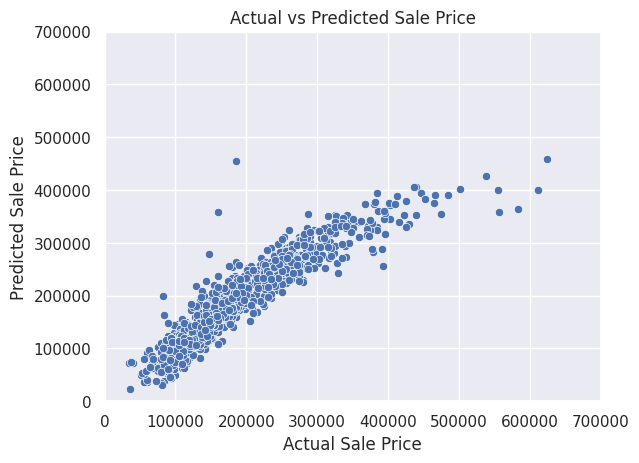

In [ ]:
# Add predictions to the training dataset
df_train['reg2_SalePrice'] = results.predict(sm.add_constant(df_train[features]))

# Calculate correlation between actual and predicted SalePrice
correlation = df_train['SalePrice'].corr(df_train['reg2_SalePrice'])
rmse = np.sqrt(mean_squared_error(df_train['SalePrice'], df_train['reg2_SalePrice']))
mae = mean_absolute_error(df_train['SalePrice'], df_train['reg2_SalePrice'])
r2 = r2_score(df_train['SalePrice'], df_train['reg2_SalePrice'])

# Print the correlation
print(f"Correlation: {correlation}")
print(f"RMSE: {rmse:,.0f}")
print(f"MAE: {mae:,.0f}")
print(f"R² Score: {r2:.4f}")

# Create a scatter plot to visualize the relationship
sns.scatterplot(x='SalePrice', y='reg2_SalePrice', data=df_train)
plt.title('Actual vs Predicted Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.xlim(0, 700000)
plt.ylim(0, 700000)
plt.show()

In [ ]:
# Add predictions to test dataset
df_test['reg2_SalePrice'] = results.predict(sm.add_constant(df_test[features]))

In [ ]:
# saving prediction into another dataset
df_test[['Id', 'reg2_SalePrice']].to_csv('reg2_prediction.csv', index=False)

#### Simple linear regression 3
All features - numeric and categorical

In [ ]:
# Select the features and target variable
features = numeric_features + boolean_features
target = 'SalePrice'

# Create feature and target DataFrames for training
X = df_train[features].copy()
y = df_train[target]

# Convert boolean features to int (0 or 1)
for feature in boolean_features:
    X[feature] = X[feature].astype(int)

# Add constant term
X = sm.add_constant(X)

# Create and fit model
reg3 = sm.OLS(y, X)
results = reg3.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     67.50
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        01:30:37   Log-Likelihood:                -16569.
No. Observations:                1460   AIC:                         3.364e+04
Df Residuals:                    1209   BIC:                         3.497e+04
Df Model:                         250                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.772e+

Correlation: 0.9659937165044892
RMSE: 20,534
MAE: 12,933
R² Score: 0.9331


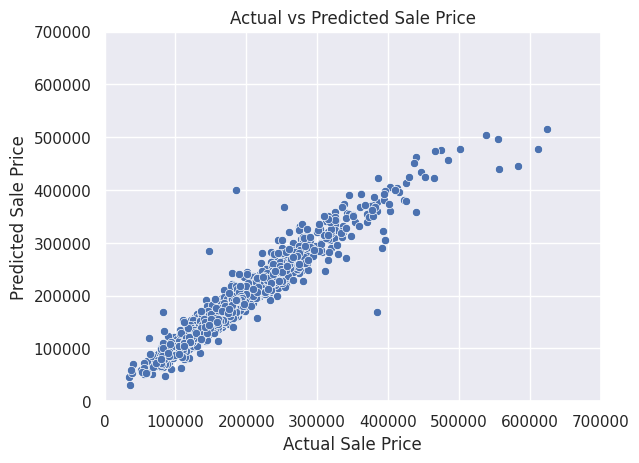

In [ ]:
# Add predictions to the training dataset
df_train['reg3_SalePrice'] = results.predict(sm.add_constant(df_train[features]))

# Calculate correlation between actual and predicted SalePrice
correlation = df_train['SalePrice'].corr(df_train['reg3_SalePrice'])
rmse = np.sqrt(mean_squared_error(df_train['SalePrice'], df_train['reg3_SalePrice']))
mae = mean_absolute_error(df_train['SalePrice'], df_train['reg3_SalePrice'])
r2 = r2_score(df_train['SalePrice'], df_train['reg3_SalePrice'])

# Print the correlation
print(f"Correlation: {correlation}")
print(f"RMSE: {rmse:,.0f}")
print(f"MAE: {mae:,.0f}")
print(f"R² Score: {r2:.4f}")

# Create a scatter plot to visualize the relationship
sns.scatterplot(x='SalePrice', y='reg3_SalePrice', data=df_train)
plt.title('Actual vs Predicted Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.xlim(0, 700000)
plt.ylim(0, 700000)
plt.show()

In [ ]:
# Add predictions to test dataset
df_test['reg3_SalePrice'] = results.predict(sm.add_constant(df_test[features]))

In [ ]:
# saving prediction into another dataset
df_test[['Id', 'reg3_SalePrice']].to_csv('reg3_prediction.csv', index=False)

#### Simple linear regression 3 (updated) for cross-validation

In [ ]:
# Prepare data (same as before)
features = numeric_features + boolean_features
target = 'SalePrice'

X = df_train[features].copy()
y = df_train[target]

for feature in boolean_features:
    X[feature] = X[feature].astype(int)

# Initialize the model
model = LinearRegression()

# Use 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validated RMSE (negative means "loss function" style, so we take the negative back)
rmse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_root_mean_squared_error')
mae_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print results
print(f"Cross-validated RMSE: {-rmse_scores.mean():,.0f}")
print(f"Cross-validated MAE: {-mae_scores.mean():,.0f}")
print(f"Cross-validated R² Score: {r2_scores.mean():.4f}")


Cross-validated RMSE: 55,989
Cross-validated MAE: 19,240
Cross-validated R² Score: 0.3870


#### Simple linear regression 3 (updated) with standardized numeric_features

In [ ]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Select features and target
features = numeric_features + boolean_features
target = 'SalePrice'

# === PREPARE TRAINING DATA ===
X_train = df_train[features].copy()
y_train = df_train[target]

# Standard scale numeric features
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# Convert boolean features to int
for feature in boolean_features:
    X_train[feature] = X_train[feature].astype(int)

# Add constant term
X_train = sm.add_constant(X_train, has_constant='add')

# Fit model
reg_std = sm.OLS(y_train, X_train)
results_std = reg_std.fit()
print(results_std.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     67.50
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        01:30:42   Log-Likelihood:                -16569.
No. Observations:                1460   AIC:                         3.364e+04
Df Residuals:                    1209   BIC:                         3.497e+04
Df Model:                         250                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -8.008e+

In [ ]:
# === PREPARE TEST DATA ===
X_test = df_test[features].copy()

# Apply same scaling to test numeric features
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Convert boolean features to int
for feature in boolean_features:
    X_test[feature] = X_test[feature].astype(int)

# Add constant term
X_test = sm.add_constant(X_test, has_constant='add')

# Ensure column alignment with training data
X_test = X_test[X_train.columns]

# Predict on test data
df_test['reg_std_SalePrice'] = results_std.predict(X_test)

In [ ]:
# saving prediction into another dataset
df_test[['Id', 'reg_std_SalePrice']].to_csv('reg_std_prediction.csv', index=False)

Standardization improves readability but prediciton using OLS does not improve.

#### Simple linear regression 5
All features - numeric and business sense

In [ ]:
# Select the features and target variable
subset_bool = ['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
               'LandSlope_Mod', 'LandSlope_Sev', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
               'RoofMatl_WdShngl', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NB', 'BsmtQual_TA', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageQual_Fa',
               'GarageQual_Gd', 'GarageQual_NG', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_NG', 'GarageCond_Po', 'GarageCond_TA',
               'Condition1_PosA', 'Condition1_PosN', 'Condition2_PosA', 'Condition2_PosN', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
               'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_NB', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
               'BsmtFinType1_LwQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'SaleCondition_Normal', 'SaleCondition_Partial']
features = numeric_features + subset_bool
target = 'SalePrice'

# Create feature and target DataFrames for training
X = df_train[features].copy()
y = df_train[target]

# Convert boolean features to int (0 or 1)
for feature in subset_bool:
    X[feature] = X[feature].astype(int)

# Add constant term
X = sm.add_constant(X)

# Create and fit model
reg5 = sm.OLS(y, X)
results = reg5.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     164.2
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        01:30:42   Log-Likelihood:                -16727.
No. Observations:                1460   AIC:                         3.364e+04
Df Residuals:                    1367   BIC:                         3.413e+04
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.216e+

In [ ]:
# Extract regression results into a DataFrame
summary_df = pd.DataFrame({
    'coef': results.params,
    'std_err': results.bse,
    't': results.tvalues,
    'p_value': results.pvalues
})

# Save to CSV
summary_df.to_csv('regression_summary.csv')

Correlation: 0.9576084348504664
RMSE: 22,877
MAE: 14,741
R² Score: 0.9170


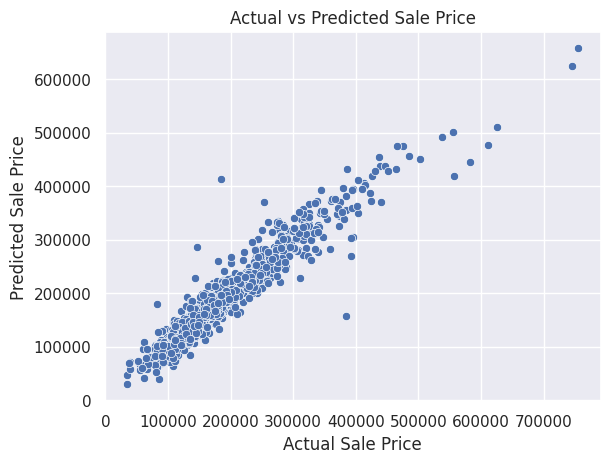

In [ ]:
# Add predictions to the training dataset
df_train['reg5_SalePrice'] = results.predict(sm.add_constant(df_train[features]))

# Calculate correlation between actual and predicted SalePrice
correlation = df_train['SalePrice'].corr(df_train['reg5_SalePrice'])
rmse = np.sqrt(mean_squared_error(df_train['SalePrice'], df_train['reg5_SalePrice']))
mae = mean_absolute_error(df_train['SalePrice'], df_train['reg5_SalePrice'])
r2 = r2_score(df_train['SalePrice'], df_train['reg5_SalePrice'])

# Print the correlation
print(f"Correlation: {correlation}")
print(f"RMSE: {rmse:,.0f}")
print(f"MAE: {mae:,.0f}")
print(f"R² Score: {r2:.4f}")

# Create a scatter plot to visualize the relationship
sns.scatterplot(x='SalePrice', y='reg5_SalePrice', data=df_train)
plt.title('Actual vs Predicted Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

In [ ]:
# Add predictions to test dataset
df_test['reg5_SalePrice'] = results.predict(sm.add_constant(df_test[features]))

In [ ]:
# saving prediction into another dataset
df_test[['Id', 'reg5_SalePrice']].to_csv('reg5_prediction.csv', index=False)

#### Simple linear regression 4
All features - numeric and low p-value categorical

In [ ]:
# Select the features and target variable
subset_bool = ['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
               'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
               'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_NB', 'BsmtQual_TA', 'KitchenQual_Fa',
               'KitchenQual_Gd', 'KitchenQual_TA', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_NG', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa',
               'GarageCond_Gd', 'GarageCond_NG', 'GarageCond_Po', 'GarageCond_TA']
features = numeric_features + subset_bool
target = 'SalePrice'

# Create feature and target DataFrames for training
X = df_train[features].copy()
y = df_train[target]

# Convert boolean features to int (0 or 1)
for feature in subset_bool:
    X[feature] = X[feature].astype(int)

# Add constant term
X = sm.add_constant(X)

# Create and fit model
reg4 = sm.OLS(y, X)
results = reg4.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     166.6
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        01:30:43   Log-Likelihood:                -16889.
No. Observations:                1460   AIC:                         3.392e+04
Df Residuals:                    1387   BIC:                         3.431e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.438e+06 

In [ ]:
# Extract regression results into a DataFrame
summary_df = pd.DataFrame({
    'coef': results.params,
    'std_err': results.bse,
    't': results.tvalues,
    'p_value': results.pvalues
})

# Save to CSV
summary_df.to_csv('regression_summary.csv')

Correlation: 0.946757589412793
RMSE: 25,568
MAE: 15,784
R² Score: 0.8963


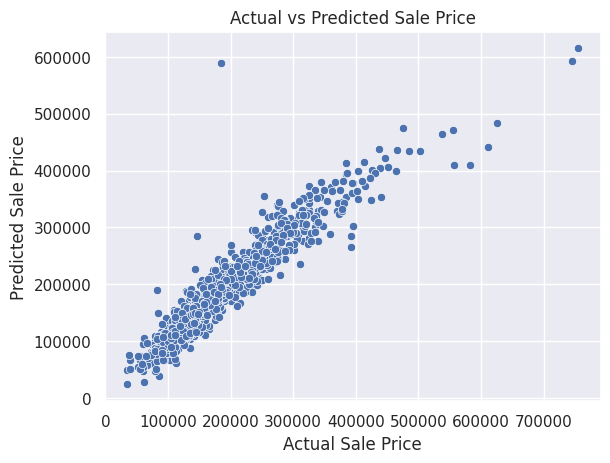

In [ ]:
# Add predictions to the training dataset
df_train['reg4_SalePrice'] = results.predict(sm.add_constant(df_train[features]))

# Calculate correlation between actual and predicted SalePrice
correlation = df_train['SalePrice'].corr(df_train['reg4_SalePrice'])
rmse = np.sqrt(mean_squared_error(df_train['SalePrice'], df_train['reg4_SalePrice']))
mae = mean_absolute_error(df_train['SalePrice'], df_train['reg4_SalePrice'])
r2 = r2_score(df_train['SalePrice'], df_train['reg4_SalePrice'])

# Print the correlation
print(f"Correlation: {correlation}")
print(f"RMSE: {rmse:,.0f}")
print(f"MAE: {mae:,.0f}")
print(f"R² Score: {r2:.4f}")

# Create a scatter plot to visualize the relationship
sns.scatterplot(x='SalePrice', y='reg4_SalePrice', data=df_train)
plt.title('Actual vs Predicted Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

In [ ]:
# Add predictions to test dataset
df_test['reg4_SalePrice'] = results.predict(sm.add_constant(df_test[features]))

In [ ]:
# saving prediction into another dataset
df_test[['Id', 'reg4_SalePrice']].to_csv('reg4_prediction.csv', index=False)